In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm


In [11]:
df = pd.read_csv('../data/kc_house_data.csv', parse_dates=['date'])
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [12]:
df_f = df[['price', 'bedrooms', 'bathrooms','sqft_living', 'floors', 'yr_built', 'lat', 'long']]
df_f.head()

,price,bedrooms,bathrooms,sqft_living,floors,yr_built,lat,long
0,221900.0,3,1.00,1180,1.0,1955,47.5112,-122.257
1,538000.0,3,2.25,2570,2.0,1951,47.7210,-122.319
2,180000.0,2,1.00,770,1.0,1933,47.7379,-122.233
3,604000.0,4,3.00,1960,1.0,1965,47.5208,-122.393
4,510000.0,3,2.00,1680,1.0,1987,47.6168,-122.045


In [13]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [14]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   price          21597 non-null  float64       
 3   bedrooms       21597 non-null  int64         
 4   bathrooms      21597 non-null  float64       
 5   sqft_living    21597 non-null  int64         
 6   sqft_lot       21597 non-null  int64         
 7   floors         21597 non-null  float64       
 8   waterfront     19221 non-null  object        
 9   view           21534 non-null  object        
 10  condition      21597 non-null  object        
 11  grade          21597 non-null  object        
 12  sqft_above     21597 non-null  int64         
 13  sqft_basement  21597 non-null  object        
 14  yr_built       21597 non-null  int64         
 15  yr_renovated   1775

### Date

In [16]:
df['date']

0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
           ...    
21592   2014-05-21
21593   2015-02-23
21594   2014-06-23
21595   2015-01-16
21596   2014-10-15
Name: date, Length: 21597, dtype: datetime64[ns]

In [34]:
# df['date'].str.split('/')[0][2]
# pulls out just the year for not parse_date
# maybe loop this so that can make just a 'year' column

### Bedrooms

In [18]:
df['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

### Price

In [19]:
df['price'].sort_values(ascending=False)

7245     7700000.0
3910     7060000.0
9245     6890000.0
4407     5570000.0
1446     5350000.0
           ...    
2139       82500.0
8267       82000.0
16184      81000.0
465        80000.0
15279      78000.0
Name: price, Length: 21597, dtype: float64

In [20]:
df['price'].max()

7700000.0

### Year Built

In [21]:
df['yr_built'].value_counts()

2014    559
2006    453
2005    450
2004    433
2003    420
       ... 
1933     30
1901     29
1902     27
1935     24
1934     21
Name: yr_built, Length: 116, dtype: int64

In [22]:
df.loc[(df['yr_built'] == 2014) | (df['yr_built']==2015)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
42,7203220400,2014-07-07,861990.0,5,2.75,3595,5639,2.0,NO,NONE,...,9 Better,3595,?,2014,0.0,98053,47.6848,-122.016,3625,5639
63,9528102996,2014-12-07,549000.0,3,1.75,1540,1044,3.0,NO,NONE,...,8 Good,1540,0.0,2014,0.0,98115,47.6765,-122.320,1580,3090
133,8929000270,2014-05-12,453246.0,3,2.50,2010,2287,2.0,NO,NONE,...,8 Good,1390,620.0,2014,0.0,98029,47.5517,-121.998,1690,1662
139,2767603505,2014-05-07,519950.0,3,2.25,1170,1249,3.0,NO,NONE,...,8 Good,1170,0.0,2014,NaN,98107,47.6722,-122.381,1350,1310
211,1025049114,2014-07-17,625504.0,3,2.25,1270,1566,2.0,NO,NONE,...,8 Good,1060,210.0,2014,0.0,98105,47.6647,-122.284,1160,1327
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21582,8956200760,2014-10-13,541800.0,4,2.50,3118,7866,2.0,NaN,AVERAGE,...,9 Better,3118,0.0,2014,0.0,98001,47.2931,-122.264,2673,6500
21586,844000965,2014-06-26,224000.0,3,1.75,1500,11968,1.0,NaN,NONE,...,6 Low Average,1500,0.0,2014,0.0,98010,47.3095,-122.002,1320,11303
21588,9834201367,2015-01-26,429000.0,3,2.00,1490,1126,3.0,NO,NONE,...,8 Good,1490,0.0,2014,0.0,98144,47.5699,-122.288,1400,1230
21589,3448900210,2014-10-14,610685.0,4,2.50,2520,6023,2.0,NO,NaN,...,9 Better,2520,0.0,2014,0.0,98056,47.5137,-122.167,2520,6023


### Model-less Baseline

In [23]:
y_mean = df_f['price'].mean()
y_mean

540296.5735055795

In [24]:
y_preds = [y_mean] * len(df_f)
y_preds

[540296.5735055795,
 540296.5735055795,
 540296.5735055795,
 540296.5735055795,
 540296.5735055795,
 540296.5735055795,
 540296.5735055795,
 540296.5735055795,
 540296.5735055795,
 540296.5735055795,
 540296.5735055795,
 540296.5735055795,
 540296.5735055795,
 540296.5735055795,
 540296.5735055795,
 540296.5735055795,
 540296.5735055795,
 540296.5735055795,
 540296.5735055795,
 540296.5735055795,
 540296.5735055795,
 540296.5735055795,
 540296.5735055795,
 540296.5735055795,
 540296.5735055795,
 540296.5735055795,
 540296.5735055795,
 540296.5735055795,
 540296.5735055795,
 540296.5735055795,
 540296.5735055795,
 540296.5735055795,
 540296.5735055795,
 540296.5735055795,
 540296.5735055795,
 540296.5735055795,
 540296.5735055795,
 540296.5735055795,
 540296.5735055795,
 540296.5735055795,
 540296.5735055795,
 540296.5735055795,
 540296.5735055795,
 540296.5735055795,
 540296.5735055795,
 540296.5735055795,
 540296.5735055795,
 540296.5735055795,
 540296.5735055795,
 540296.5735055795,


### Kitchen Sink Approach

In [25]:
X = df_f.drop(columns='price')
y = df_f['price']

model = sm.OLS(y,sm.add_constant(X)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.609
Model:                            OLS   Adj. R-squared:                  0.609
Method:                 Least Squares   F-statistic:                     4798.
Date:                Mon, 27 Jun 2022   Prob (F-statistic):               0.00
Time:                        15:57:35   Log-Likelihood:            -2.9726e+05
No. Observations:               21597   AIC:                         5.945e+05
Df Residuals:                   21589   BIC:                         5.946e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.465e+07   1.64e+06    -27.203      0.000   -4.79e+07   -4.14e+07
bedrooms     -6.06e+04   2113.573    -28.672      0.000   -6.47e+04   -5.65e+04
bathrooms    5.711e+04   3627.378     15.745      0.000       5e+04    6.42e+04
sqft_living   298.3114      2.808    106.244      0.000     292.808     303.815
floors       3.169e+04   3576.435      8.861      0.000    2.47e+04    3.87e+04
yr_built    -2286.4764     72.110    -31.708      0.000   -2427.817   -2145.136
lat          5.971e+05   1.16e+04     51.350      0.000    5.74e+05     6.2e+05
long        -1.695e+05   1.25e+04    -13.593      0.000   -1.94e+05   -1.45e+05
==============================================================================
Omnibus:                    16316.993   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           840886.066
Skew:                           3.153   Prob(JB):                         0.00
Kurtosis:                      32.911   Cond. No.                     3.10e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.1e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [26]:
df_f.corr()

,price,bedrooms,bathrooms,sqft_living,floors,yr_built,lat,long
price,1.000000,0.308787,0.525906,0.701917,0.256804,0.053953,0.306692,0.022036
bedrooms,0.308787,1.000000,0.514508,0.578212,0.177944,0.155670,-0.009951,0.132054
bathrooms,0.525906,0.514508,1.000000,0.755758,0.502582,0.507173,0.024280,0.224903
sqft_living,0.701917,0.578212,0.755758,1.000000,0.353953,0.318152,0.052155,0.241214
floors,0.256804,0.177944,0.502582,0.353953,1.000000,0.489193,0.049239,0.125943
yr_built,0.053953,0.155670,0.507173,0.318152,0.489193,1.000000,-0.148370,0.409993
lat,0.306692,-0.009951,0.024280,0.052155,0.049239,-0.148370,1.000000,-0.135371
long,0.022036,0.132054,0.224903,0.241214,0.125943,0.409993,-0.135371,1.000000


In [27]:
X.corr()

,bedrooms,bathrooms,sqft_living,floors,yr_built,lat,long
bedrooms,1.000000,0.514508,0.578212,0.177944,0.155670,-0.009951,0.132054
bathrooms,0.514508,1.000000,0.755758,0.502582,0.507173,0.024280,0.224903
sqft_living,0.578212,0.755758,1.000000,0.353953,0.318152,0.052155,0.241214
floors,0.177944,0.502582,0.353953,1.000000,0.489193,0.049239,0.125943
yr_built,0.155670,0.507173,0.318152,0.489193,1.000000,-0.148370,0.409993
lat,-0.009951,0.024280,0.052155,0.049239,-0.148370,1.000000,-0.135371
long,0.132054,0.224903,0.241214,0.125943,0.409993,-0.135371,1.000000


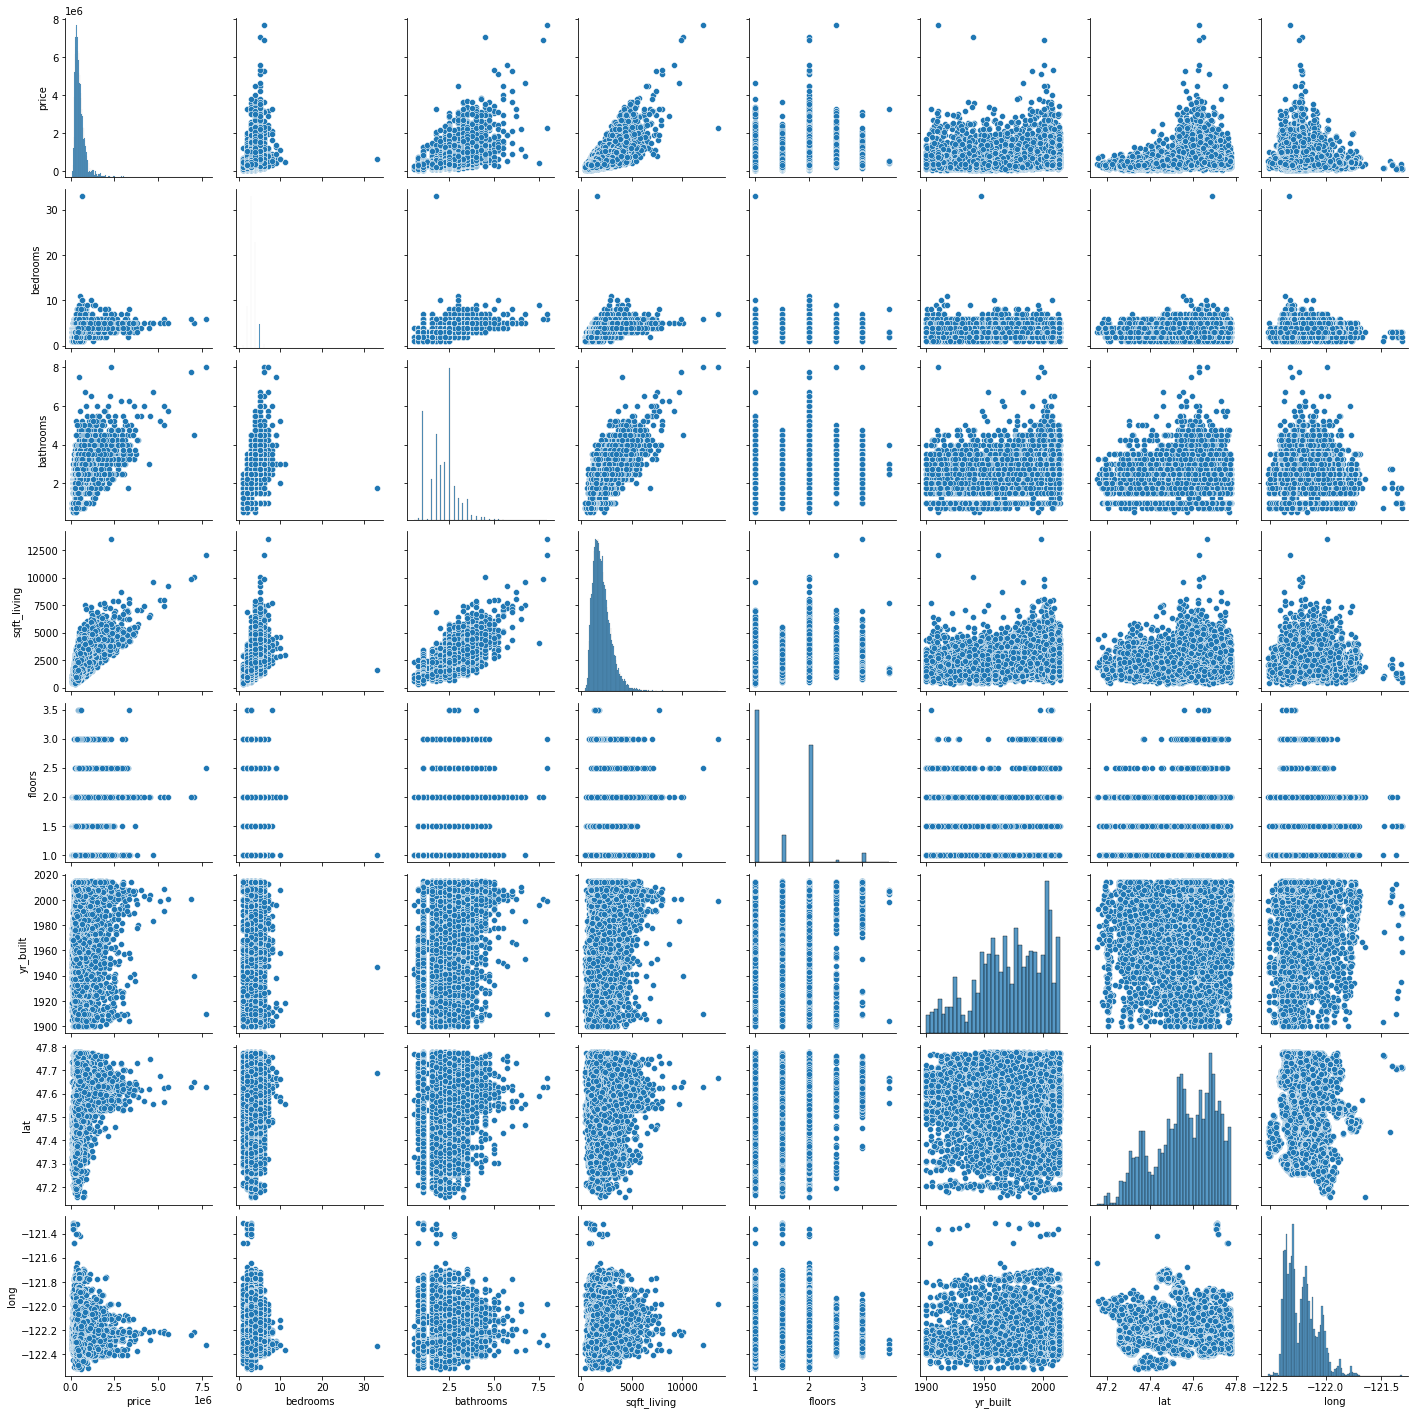

In [28]:
sns.pairplot(df_f)

<AxesSubplot:>

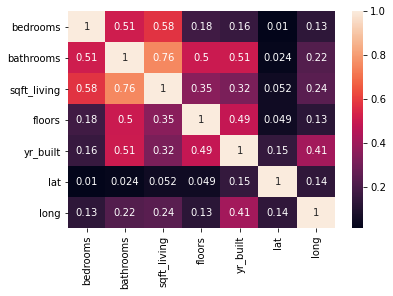

In [32]:
sns.heatmap(abs(X.corr()),annot =True)